<a href="https://colab.research.google.com/github/KyunghoonJeon/DeepLearningFromScratch/blob/main/dlfs2_3_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd /content/drive/MyDrive/deep-learning-from-scratch-2

/content/drive/MyDrive/deep-learning-from-scratch-2


In [4]:
import numpy as np
from common.layers import MatMul, SoftmaxWithLoss

In [6]:
class SimpleCBOW:
    def __init__(self, vocab_size, hidden_size):
        V, H = vocab_size, hidden_size

        # 가중치 초기화
        W_in = 0.01 * np.random.randn(V, H).astype('f')
        W_out = 0.01* np.random.randn(V, H).astype('f')

        # 계층 생성
        self.in_layer0 = MatMul(W_in)
        self.in_layer1 = MatMul(W_in)
        self.out_layer = MatMul(W_out)
        self.loss_layer = SoftmaxWithLoss()

        layers = [self.in_layer0, self.in_layer1, self.out_layer]
        self.params, self.grads = [], []
        for layer in layers:
            self.params += layer.params
            self.grads += layer.grads

        self.word_vecs = W_in

    def forward(self, contexts, target):
        h0 = self.in_layer0.forward(contexts[:, 0])
        h1 = self.in_layer1.forward(contexts[:, 1])
        h = (h0 + h1) * 0.5
        score = self.out_layer.forward(h)
        loss = self.loss_layer.forward(score, target)
        return loss

    def backward(self, dout=1):
        ds = self.loss_layer.backward(dout)
        da = self.out_layer.backward(ds)
        da *= 0.5
        self.in_layer1.backward(da)
        self.in_layer0.backward(da)
        return None

In [8]:
from common.trainer import Trainer
from common.optimizer import Adam
from ch03.simple_cbow import SimpleCBOW
from common.util import preprocess, create_contexts_target, convert_one_hot

In [9]:
window_size = 1
hidden_size =5
batch_size = 3
max_epoch = 1000

In [10]:
text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)

In [12]:
vocab_size = len(word_to_id)
contexts, target = create_contexts_target(corpus, window_size)
target = convert_one_hot(target, vocab_size)
contexts = convert_one_hot(contexts, vocab_size)

In [13]:
model = SimpleCBOW(vocab_size, hidden_size)
optimizer = Adam()
trainer = Trainer(model, optimizer)

| 에폭 1001 |  반복 1 / 2 | 시간 0[s] | 손실 0.80
| 에폭 1002 |  반복 1 / 2 | 시간 0[s] | 손실 0.44
| 에폭 1003 |  반복 1 / 2 | 시간 0[s] | 손실 0.52
| 에폭 1004 |  반복 1 / 2 | 시간 0[s] | 손실 0.46
| 에폭 1005 |  반복 1 / 2 | 시간 0[s] | 손실 0.46
| 에폭 1006 |  반복 1 / 2 | 시간 0[s] | 손실 0.60
| 에폭 1007 |  반복 1 / 2 | 시간 0[s] | 손실 0.54
| 에폭 1008 |  반복 1 / 2 | 시간 0[s] | 손실 0.49
| 에폭 1009 |  반복 1 / 2 | 시간 0[s] | 손실 0.41
| 에폭 1010 |  반복 1 / 2 | 시간 0[s] | 손실 0.64
| 에폭 1011 |  반복 1 / 2 | 시간 0[s] | 손실 0.51
| 에폭 1012 |  반복 1 / 2 | 시간 0[s] | 손실 0.51
| 에폭 1013 |  반복 1 / 2 | 시간 0[s] | 손실 0.59
| 에폭 1014 |  반복 1 / 2 | 시간 0[s] | 손실 0.36
| 에폭 1015 |  반복 1 / 2 | 시간 0[s] | 손실 0.49
| 에폭 1016 |  반복 1 / 2 | 시간 0[s] | 손실 0.40
| 에폭 1017 |  반복 1 / 2 | 시간 0[s] | 손실 0.72
| 에폭 1018 |  반복 1 / 2 | 시간 0[s] | 손실 0.38
| 에폭 1019 |  반복 1 / 2 | 시간 0[s] | 손실 0.54
| 에폭 1020 |  반복 1 / 2 | 시간 0[s] | 손실 0.59
| 에폭 1021 |  반복 1 / 2 | 시간 0[s] | 손실 0.42
| 에폭 1022 |  반복 1 / 2 | 시간 0[s] | 손실 0.59
| 에폭 1023 |  반복 1 / 2 | 시간 0[s] | 손실 0.43
| 에폭 1024 |  반복 1 / 2 | 시간 0[s] | 

/usr/local/lib/python3.8/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 48152 (\N{HANGUL SYLLABLE BAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.8/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 48373 (\N{HANGUL SYLLABLE BOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.8/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 49552 (\N{HANGUL SYLLABLE SON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.8/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


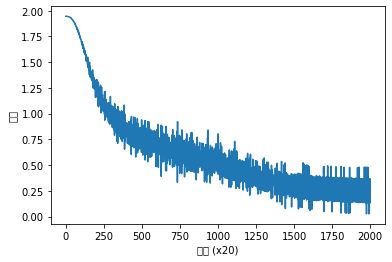

In [15]:
trainer.fit(contexts, target, max_epoch, batch_size)
trainer.plot()

In [16]:
word_vecs = model.word_vecs
for word_id, word in id_to_word.items():
    print(word, word_vecs[word_id])

you [-2.1875112  -1.5340015   0.06774596 -0.48431364  2.6654146 ]
say [-0.2751757  1.3494201 -1.325278   1.3255115 -1.4471624]
goodbye [-0.12403905 -0.83628106  1.9077946  -1.6970085  -0.44365346]
and [-2.6474426   0.8915109  -0.79057163  0.82337373 -0.8919413 ]
i [-0.14005809 -0.85732937  1.9133546  -1.7005848  -0.44327965]
hello [-2.1820514  -1.5489342   0.04649642 -0.48316616  2.6369965 ]
. [ 2.1550922  1.4838707 -1.4585623  1.487022  -1.5903302]
